## 英文斷詞

In [1]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

## 安裝Jieba
- ! pip install jieba

In [2]:
! pip install jieba

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 中文斷詞

In [1]:
import jieba
a = '那酸民婉君也可以報名嗎?'

for w in jieba.cut(a):
    print(w)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.731 seconds.
Prefix dict has been built succesfully.


那
酸民
婉君
也
可以
報名
嗎
?


## 正規表達法斷句

In [5]:
a = '''
跑車自撞山壁！新北市新店區北宜路今上午6時許發生跑車自撞山壁意外，52歲的甘姓男子當時駕駛麥拉倫，與同行4名友人預計前往宜蘭遊玩，卻在途中突然打滑、自撞旁邊山壁，車輛幾乎全毀，警方獲報到場處理，甘男酒測值為0，車輛已由拖吊車拖離，未造成其他傷亡。
'''

In [9]:
import re
re.split('[！，、。]', a)

['\n跑車自撞山壁',
 '新北市新店區北宜路今上午6時許發生跑車自撞山壁意外',
 '52歲的甘姓男子當時駕駛麥拉倫',
 '與同行4名友人預計前往宜蘭遊玩',
 '卻在途中突然打滑',
 '自撞旁邊山壁',
 '車輛幾乎全毀',
 '警方獲報到場處理',
 '甘男酒測值為0',
 '車輛已由拖吊車拖離',
 '未造成其他傷亡',
 '\n']

In [14]:
a = 'my phone number is 0912345678 call me'
import re
re.match('\d{10}', a)

In [15]:
re.match('.*\d{10}.*', a)

<_sre.SRE_Match object; span=(0, 37), match='my phone number is 0912345678 call me'>

In [16]:
re.search('\d{10}', a)

<_sre.SRE_Match object; span=(19, 29), match='0912345678'>

In [19]:
a = 'my phone number is 0912345678 call me this number or 0922333555'
m = re.match('.*\d{10}.*\d{10}.*', a) 
m.group(0)


'my phone number is 0912345678 call me this number or 0922333555'

In [21]:
for ele in re.finditer('\d{10}',a):
    print(ele)

<_sre.SRE_Match object; span=(19, 29), match='0912345678'>
<_sre.SRE_Match object; span=(53, 63), match='0922333555'>


In [23]:
a.find('0912345678')

19

In [5]:
import jieba
jieba.load_userdict('userdict.txt')
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認", cut_all=True)
print("Full Mode:", "/ ".join(seg_list))

Full Mode: 大巨蛋/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認


In [6]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
print("Default Mode:", "/ ".join(seg_list))

Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/  / 柯P/ 否認


In [7]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))

Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/  / 柯P/ 否認


## 字典路徑
- C:\ProgramData\Anaconda3\Lib\site-packages\jieba

## jieba 繁中版本
- https://github.com/ldkrsi/jieba-zh_TW

In [9]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？柯P否認")

for w in words:
    print(w.word, w.flag)

大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 x
？ x
柯P nr
否認 v


In [11]:
sentence = "大巨蛋案對市府同仁下封口令？柯P否認"
words = jieba.tokenize(sentence)
for tw in words:
    print(tw[0], tw[1], tw[2])


大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
柯P 14 16
否認 16 18


## 抓取新聞關鍵字

In [13]:
import requests
res = requests.get('http://ec.ltn.com.tw/article/breakingnews/2587230')
#res.text

In [14]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [18]:
[e.text.strip() for e in soup.select('.keyword a')]

['中國', '千禧藍寶石', '旭龍再生資源', '泡沫化']

## 抓取維基百科同義詞 

In [21]:
import requests
res = requests.get('https://zh.wikipedia.org/wiki/%E6%9F%AF%E6%96%87%E5%93%B2')
#res.text

In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [27]:
for p in soup.select('.mw-parser-output p')[0:3]:
    for b in p.select('b'):
        print(b.text)

臺北市市長
柯文哲
柯P
KP


## 詞頻分析

In [28]:
speech = '''
大會主席蘇嘉全院長，現場各位貴賓，電視機前面、以及網路上收看直播的全體國人同胞，大家早安，大家好！

今天是中華民國一百零七歲的生日，現場有許多來自全世界各地的僑胞和好朋友，跟我們一起歡度國家的慶典。我要代表臺灣人民，跟遠道而來的各位，致上最深的謝意。

在國慶的這一天，我們不只要共同慶祝，更要一起思考國家的未來。過去一年，新的國際局勢正在考驗著每一個國家，當然也考驗著我們。

政府無時無刻都在思考，如何從挑戰中發現機遇，如何在變動中，找出國家最佳戰略跟出路。今天我就要藉著這個機會，向全國人民完整說明政府的因應之道。

相信大家都觀察到，國際政經局勢正在面臨劇烈的變化。美中之間的貿易衝突，讓國際產業分工出現重組，也對原有的經貿秩序帶來衝擊。

在此同時，印太地區以及兩岸關係的複雜度，也相應升高。中國試圖挑戰區域現狀的作為，已經引起國際社會高度地關注。臺灣位處西太平洋第一線，自然承受巨大的壓力。

這段時間以來，中國單方面的文攻武嚇和外交打壓，不但傷害了兩岸關係，更嚴重挑戰了臺海和平穩定的現狀。

面對打壓，有些人希望政府採取更具對抗性的立場。不過，也有另一些人認為，我們應該要退讓妥協。

但是各位，越是劇烈的變局，臺灣就越要維持穩定，以沉著的態度化解壓力，冷靜地尋找生存的利基。

這是兩年多來我一貫的堅持。維護兩千三百萬人民自由民主的生活方式，捍衛中華民國的永續發展，維持臺海和平跟區域穩定，這是全體臺灣人民最大的公約數，每一個負責任的政治人物和政黨，都應該要堅持捍衛到底！

當全世界都在因應中國勢力擴張的同時，我所領導的政府要讓世界看見臺灣的強韌。捍衛臺灣的最佳方案，就是要讓臺灣在世界上變得不可或缺，也不可取代。

外在力量企圖單方面改變臺海現狀的做法，不可能被臺灣人民接受，任何違反普世價值的主張，也絕不會獲得國際社會的認同和支持。

我也要再一次呼籲北京當局，一個負責任的大國，應該在區域及全球，扮演良性的角色，而不是衝突的來源。

做為總統，我要向大家保證，我們不會貿然升高對抗，也不會屈從退讓。我不會因一時的激憤，走向衝突對抗，而讓兩岸關係陷入險境。我也不會背離民意，犧牲臺灣的主權。在變局當中，我們絕對不能錯估情勢。激化衝突或者妥協屈從，都只會治絲益棼。

我們的因應之道，就是「求穩、應變、進步」。這條路雖然充滿了挑戰，但卻是現階段臺灣必須穩健前行的道路。

有效的因應策略，植基於堅強的國力。所以當前最重要的任務，就是強化國家安全、強化經濟實力、強化社會安全網，不斷地「壯大臺灣」，厚植實力，提升臺灣在國際上的不可替代性，這才是臺灣永續生存的利基。

當前國家安全所面臨的挑戰，已經不僅僅是傳統國防軍事安全。外交施壓、社會滲透，甚至經濟安全，都是可能造成威脅的手段。當務之急，就是建構整體戰略，啟動國家安全強化的工程。

國家安全整體布局的第一個面向，就是在外交上強化價值連結，建構臺灣不可取代的戰略重要性。

臺灣擁有重要的地緣戰略地位，面對國際變局，我們的戰略選擇相當清楚，就是要堅守自由民主以及市場經濟。這兩項根本價值，是臺灣今天成為亞洲民主典範，及發展經濟實力的重要基礎。

過去兩年，在中國的壓力之下，我們堅持價值理念，展現高度韌性，讓越來越多理念相近國家，表達對中華民國臺灣的支持。

尤其是美國，最近不僅國會通過了許多友臺法案，日前彭斯副總統，也公開譴責中國打壓臺灣外交，並且肯定臺灣的民主制度。

和臺灣共享民主價值的日本，無論是在國際場合的聲援、或是天災時相互協助關懷，都讓兩國間的友誼越發密切。

前陣子，歐洲議會也通過決議，肯定臺灣民主發展，同時也呼籲歐盟國家全力遏止中國武力挑釁臺灣、破壞臺海和平。

我們也有很多友邦，積極為臺灣奔走，呼籲國際合作不該遺漏臺灣。今天，三位為臺灣仗義執言的好朋友，巴拉圭的阿布鐸總統閣下、聖克里斯多福及尼維斯的席頓總督閣下，以及聖露西亞的查士納總理閣下，也出席了我們的國慶典禮。

讓我們藉著這個機會，向他們表達最誠摯的感謝。現在請大家用熱情的掌聲，歡迎這三位遠道而來的貴賓。

國家安全整體布局的第二個面向，就是提升國防戰力。

「重層嚇阻，防衛固守」，是我們的軍事戰略。它的核心價值，就在提升中華民國國軍的戰力。我曾經說過，只要蔡英文任總統的一天，國防預算每年都會穩定成長。我們精實的部隊和戰備，絕對有能力捍衛中華民國臺灣的主權！

此外，我們也全力強化「國防自主」的能力。今年六月，我到漢翔公司，主持高教機的開架典禮，今年八月，我也在海軍司令部宣布「新海軍啟航」。

重啟延宕多時的高教機國造和潛艦國造計畫，將引領國防工業邁向新時代。未來的國防工業，不只能夠強化國軍戰力，更能夠透過帶動產業升級跟群聚，成為經濟發展的重要動力。

國家安全布局的第三個面向，是阻止外來勢力對國內進行滲透破壞，確保民主制度及社會經濟正常運作。

臺灣的多元民主，是我們堅決守護的價值。但是如果有其他國家，利用臺灣社會的自由，來進行滲透、製造亂象，我們一定會用盡一切方式來防範，絕對不會坐視。

無論是製造散布假消息、非法竊取科技情報，還是蓄意破壞資訊安全系統，甚至企圖用各種方式介入選舉、干擾政治運作的行為，只要罪證確鑿，我們一定嚴辦到底。

針對系統性、來自特定國家背景的假消息傳播，我們也會加強跨國合作。不僅僅是交流經驗，未來更要建立查核和通報機制，共同來因應這些假消息對各國的社會穩定，所帶來的破壞和衝擊。

國家安全整體布局的第四個面向，就是全球經貿戰略的重整及全新布局。

面對美中貿易衝突，和全球經貿秩序重建的巨大變局，我們必須調整臺灣在區域發展及全球供應鏈的角色。我們要以中、大型臺商在區域分工的整合能力及全球布局能量，加上中小企業的活力，來開展全新的戰略布局，催化臺灣經濟全面轉型升級。

我們要做三件重要的事情：

第一，從產業結構及資源互補的角度，在研發及尖端製造領域，和美、歐、日等工業先進國家，建立緊密的產業分工及技術連結，創造全新、高效率的供應鏈。

第二，從資源及市場共享的角度，在具發展潛力的新南向國家及其他新興市場，透過多元合作，共同打造攸關經濟發展及民生福祉的關鍵產業鏈，促進經濟的共榮發展。

第三，在我們的邦交國，協同當地政府共同面對氣候變遷的挑戰及尋找新的發展機會，打下經濟永續發展的基礎，也為臺灣開闢未來的新市場、新生產基地、以及全球布局的新據點。

在經濟實力的強化上，我們必須要強力的推動經濟轉型，有效率的執行基礎建設計畫，認真解決五缺問題，並將經濟成長的利益，由全民共享。

經濟轉型的關鍵在科技。政府正努力朝「系統導向、軟硬整合、軍民合一，以及國際鏈結」四大目標，快速提升科技水準及研發的能量，以作為經濟提升的重要基礎。

我們用新的思維，拆解不合時宜的框架，也鬆綁了阻礙競爭的約束，帶領產業走向新的機遇。

在這當中，「5加2產業創新計畫」已經有效驅動產業升級轉型。導入智慧製造的機械產業，去年的產值已經突破一兆元，精密度跟附加價值也更上一層樓，帶動了航太、物聯網，以及醫材的製造水準。

另外，「非核家園」的目標也確立了綠能發展的藍圖，並吸引國際離岸風電大廠前來投資。連帶地，新的風電產業鏈，也正在逐漸形成。

我們也要強化多元的國際布局，產業才有能力在面對變局時，快速調整供應鏈來因應。

行政院已經組成專案小組，協助臺商多元布局生產基地。願意回臺灣投資的臺商，我們鼎力相助，如果希望到其他國家投資布局，我們也會全力支援。

今年，「前瞻基礎建設」計畫第一期特別預算已經開始執行，建設的效益會逐漸展現，對擴大內需的貢獻也在發酵當中。這當中的綠能、數位、水資源、軌道、城鄉，是下一階段臺灣要優先投資的基礎建設。

在彰化，透過綠電稅收，政府有了穩定的財政基礎，可以確保學生營養午餐、社會福利實施的財政平衡。

在原鄉部落及偏遠地區，我們鋪設了寬頻建設，讓小朋友透過網路跟世界連結，拉近城鄉的差距。

在水資源建設上，透過石門水庫中庄調整池、湖山水庫下游自來水工程、曾文水庫防淤隧道的興建，我們穩定了從北到南的供水。

因為極端氣候強降雨所造成的局部地區淹水問題，也正透過各地滯洪池、人工湖、河川整治和下水道清淤等工程，希望做到快速減災的效果。

在交通建設方面，東部地區，透過蘇花公路改善計畫、南迴公路改善計畫，已經初步看見成果。

大家所關心的軌道建設，我們也加緊努力，強化進入東部地區的鐵路系統，以及花東之間的鐵路系統，讓環島的鐵路系統更加完備。

連結北部都會地區的基隆輕軌、新竹輕軌，串連中部區域的臺中山手線，以及捷運綠線延伸彰化方案，還有高雄捷運紅線延伸、黃線新建案等，從南到北，許多新建計畫都已經展開規劃，並陸續進入核定階段。

軌道建設的發展，不僅提供便捷的交通，更能有效減少汽機車造成的空氣污染。

大力推動前瞻基礎建設的目的，就是要改善投資環境、均衡區域發展，為臺灣的下一個世代創造更優質的環境和生活。

我們致力改善產業的投資環境。企業所關切的生產元素，包括土地、水、電、人才、勞工的五缺問題，在賴院長「做實事」的態度下，一項又一項逐步解決。

請大家回憶一下，去年夏天，能源供應十分緊張，供電警戒的橘燈一共亮起六十六天。今年夏天，無論天氣和景氣，都比去年熱，但是供電警戒的橘燈一天也沒有亮過，我們度過了供電危機。

我們再回憶一下，今年上半年，西部地區降雨很少，大家都擔心缺水。但是透過開源、節流、調度和備援的措施，再加上前瞻基礎建設計畫，我們也安然度過了挑戰。

前陣子，台積電、華邦電、力晶等大廠，都加碼投資臺灣。國際大公司Google、微軟、思科、Facebook，有些準備在臺灣設置研發中心，有些是提出新的合作計畫，這些代表了我們改善投資環境的成果，得到了國內外廠商的肯定。

當經濟結構轉型的工程啟動，基礎建設開始興建，投資環境呈現改善的同時，我們看見景氣復甦，臺灣經濟也開始穩健成長。

兩年前，我們走出了連續三季的衰退；今年一到五月的失業率，是十八年來同期新低。2017年實質總薪資更創歷史新高，結束了薪資倒退十幾年的窘境。

經濟指標變好，當然令人欣喜，但是對政府來說，最重要的事情是，怎麼將經濟成長的紅利，分享給所有人民。

今年，我們把軍公教調高薪資百分之三，帶動了企業加薪的風潮。我們也加速調漲基本工資，明年起將達到兩萬三千一百元，終於擺脫了22K。此外，我們也為學貸增加了四年的寬緩期，減輕學貸族的負擔。

明年起生效的租稅改革方案，優化稅制也兼顧租稅公平，大幅調高四大扣除額，未來月薪三萬元以下的民眾，就不需要繳個人所得稅。有學齡前兒童的家庭，免稅額也大大提高。

在健全社會安全體系方面，2016年，我剛剛就任時，大家最憂慮的就是，房價太高、長輩沒有人照顧、育兒負擔沉重、社會治安不佳、毒品氾濫動搖國本等問題。整個國家的社會安全體系，可以說是百廢待舉。因此這兩年來，我們幾乎是用急行軍的速度，來健全社會安全體系。

攸關居住正義問題的社會住宅，透過多元興辦，目前完工和正在興辦中的，已經超過兩萬四千戶。加上後續開工的案件，今年年底總戶數將可達到近三萬五千戶。在問題最嚴峻的雙北市，近兩年已經有超過五千四百戶陸續入住，我也去視察了其中幾個，無論是質或量，都令人滿意。

民眾迫切需要的長照服務，現在升級成「長照2.0」，只要打1966長照專線，就有專人來協助。我們擴大了服務對象和範圍；我們也提高了待遇，使得更多人投入長照服務，增加了服務供給，讓更多家庭的需求被滿足。因為這些努力，接受長照服務人數，在最近一年增加超過五成。而接受喘息服務人數，最近一年則增加了一倍。

生育率低，已經成為國安問題。我們除了提供津貼，更透過「準公共化系統」的建置，朝公共化教保的目標邁進了一步。目前，準公共化和公共化托育，共可提供平價收托量達到五萬六千人，比過去更加普及。我們的目標很清楚，減輕家長的負擔，生育率就有機會改善。

大家所關心的治安問題，我們透過科技協助，智慧部署警力，犯罪發生數確實呈現下降趨勢。我們也對組織犯罪和詐騙進行全面掃蕩，今年到現在，檢警依違反新修正的《組織犯罪防制條例》，積極打擊包括詐騙集團、幫派在內的各類犯罪組織，起訴超過一千三百人。

今年二月和六月兩波「安居緝毒方案」，查獲各級毒品高達九千七百公斤，所逮捕的製毒者、販毒者和藥頭，加起來超過一千九百人。我們更在四年內投入一百億的經費，執行「新世紀反毒策略」，將毒品網絡從社會連根拔起。

各位國人同胞，國家發展的方向已經在改變。改變並不可怕，因為改變是為了因應世界的變化，讓臺灣能夠繼續屹立不搖。

改變也是為了改正過去的錯誤，讓我們把國家交給下一代的時候，不會再有難以承擔的包袱。所以這兩年多來，我們全力衝刺國政的改革。國家要進步，就不能走回頭路。

年金改革我們不能走回頭路。因為我們不能讓每一個世代都陷入財務危機的懸崖邊緣。

非核家園也不能走回頭路。這不只是為了核電廠所在的新北和屏東，更是為了世世代代的臺灣人，能免於核災的威脅。

轉型正義更不能走回頭路。過去執政者犯的錯誤，現在的政府更要勇敢面對，透過釐清真相，記取教訓，民主才會向前跨大步。

改革也許有陣痛，但是在十年、二十年之後，下一代會感到也會感謝我們此刻的選擇。這是考驗領導人意志的時刻，我會把這個重擔扛起來，帶領國家往正確的方向走。

在最後，我要特別感謝今天的國歌領唱代表，他們是一群「燈塔守護者」。

我們全國各地的海岸，有三十六座燈塔。有一群人，負責守護著燈塔，維護海上航行的安全。我要代表國家，感謝各位忍受著孤獨和艱難，照亮海岸。

臺灣就是一個燈塔。我們的民主轉型，不僅照亮了自己曾經走過的黑暗，也為所有追求民主的人們，提供了暗夜中的光芒。所以，在香港、在中國大陸，以及在世界上各個角落，追求民主的朋友，請往臺灣的方向看過來。臺灣的民主，會照亮世界！

當世界看見臺灣的美好，臺灣就不會孤獨。我要告訴國際友人，這條路，我們會勇敢堅定地走下去！

臺灣的民主也許吵吵鬧鬧，但我們一向因臺灣而團結，因團結而堅強。因為這個國家，屬於兩千三百萬人民，這個國家，要完整地傳給世世代代！

我們始終相信，臺灣人能用獨特的堅韌，面對從來不曾停止過的內外挑戰，團結起來，讓國家更好，這就是今年國慶的主題，「臺灣共好」的最佳寫照。最後，我要祝大家身體健康，萬事如意，中華民國生日快樂。謝謝，謝謝大家！
'''

In [43]:
stopwords = ['就是','透過', '以及']

In [44]:
import jieba
jieba.load_userdict('userdict.txt')
words = list(jieba.cut(speech))

In [45]:
#words

In [46]:
from collections import Counter
c = Counter(words)

In [49]:
for w, cnt in c.most_common(50):
    if len(w) >=2 and w not in stopwords:
        print(w, cnt)

臺灣 45
國家 26
經濟 19
安全 15
國際 14
社會 14
發展 14
產業 12
民主 12
大家 11
布局 11
建設 11
強化 10
基礎 10
政府 9


## TFIDF

In [51]:
import math

In [50]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]

In [52]:
#tfidf('a', a, D)
tf  = 1 / 1
idf = math.log(3/3)
tf * idf

0.0

In [53]:
#tfidf('a', abb, D)
tf  = 1 / 3
idf = math.log(3/3)
tf * idf

0.0

In [54]:
#tfidf('a', abc, D)
tf  = 1 / 3
idf = math.log(3/3)
tf * idf

0.0

In [55]:
#tfidf('b', abb, D)
tf  = 2 / 3
idf = math.log(3/2)
tf * idf

0.27031007207210955

In [56]:
#tfidf('b', abc, D)
tf  = 1 / 3
idf = math.log(3/2)
tf * idf

0.13515503603605478

In [57]:
#tfidf('c', abc, D)
tf  = 1 / 3
idf = math.log(3/1)
tf * idf

0.3662040962227032

In [58]:
def tfidf(t, d, D):
    tf  = d.count(t)/len(d)
    idf = math.log(len(D)/ len([doc for doc in D if t in doc])) 
    return tf * idf

In [59]:
tfidf('c', abc, D)

0.3662040962227032

In [60]:
import jieba.analyse
jieba.analyse.extract_tags(speech, topK=10)

['臺灣', '國家', '經濟', '國際', '社會', '發展', '產業', '透過', '建設', '強化']

In [63]:
content = ['this is a book', 'this is my car']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [65]:
vectorizer.get_feature_names()

['book', 'car', 'is', 'my', 'this']

In [64]:
X.toarray()

array([[1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1]], dtype=int64)

In [72]:
content = ['經濟學獎得主暗批川普：敵視環保、遲早下台', '川普證實 美國計劃退出核飛彈條約', '美國有意退出導彈條約 川普今證實了！']

import jieba
jieba.load_userdict('userdict.txt')

corpus = [] 
for rec in content:
    corpus.append(' '.join(jieba.cut(rec)))

In [73]:
corpus

['經濟學獎 得主 暗批 川普 ： 敵視 環保 、 遲早 下台',
 '川普 證實   美國 計劃 退出 核飛彈 條約',
 '美國 有意 退出 導彈 條約   川普 今 證實 了 ！']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [79]:
print(vectorizer.get_feature_names())

['下台', '導彈', '川普', '得主', '敵視', '暗批', '有意', '核飛彈', '條約', '環保', '經濟學獎', '美國', '計劃', '證實', '退出', '遲早']


In [81]:
X.toarray()

array([[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]], dtype=int64)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [83]:
X.toarray()

array([[0.36888498, 0.        , 0.21786941, 0.36888498, 0.36888498,
        0.36888498, 0.        , 0.        , 0.        , 0.36888498,
        0.36888498, 0.        , 0.        , 0.        , 0.        ,
        0.36888498],
       [0.        , 0.        , 0.27352646, 0.        , 0.        ,
        0.        , 0.        , 0.46312056, 0.35221512, 0.        ,
        0.        , 0.35221512, 0.46312056, 0.35221512, 0.35221512,
        0.        ],
       [0.        , 0.46312056, 0.27352646, 0.        , 0.        ,
        0.        , 0.46312056, 0.        , 0.35221512, 0.        ,
        0.        , 0.35221512, 0.        , 0.35221512, 0.35221512,
        0.        ]])

## 文章相似度判斷

In [88]:
import numpy as np
import math
a = np.array([1,1,0,0,0,1])
b = np.array([1,0,1,0,0,1])
math.sqrt(sum((a - b) ** 2))

1.4142135623730951

In [89]:
content = ['丁守中打臉書社群戰　「白天掃馬路、晚上掃網路」',
'至於聲量能否轉換成選票？孫大千表示，對丁守中來說，網路不是他熟悉的領域，他希望透過平台向年輕人傳遞訊息，至於能夠接收多少認同，不是他所能控制，但他認為國民黨必須具備空戰能力，所以他幫忙練兵，與其找網紅不如自己培養網紅，像這次Rap競選歌曲「台北的未來在手中」，就是放手給幕僚去做，點擊率也是臉書上最高的，且絕對深具洗腦功能。']

In [90]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = [' '.join(jieba.cut(rec)) for rec in content]
corpus

['丁守中 打 臉 書 社群 戰 \u3000 「 白天 掃馬路 、 晚上 掃 網路 」',
 '至於 聲量 能否 轉換 成選票 ？ 孫 大千 表示 ， 對 丁守中 來 說 ， 網路 不是 他 熟悉 的 領域 ， 他 希望 透過 平台 向年 輕人 傳遞 訊息 ， 至於 能夠 接收 多少 認同 ， 不是 他 所 能 控制 ， 但 他 認為 國民黨 必須 具備 空戰 能力 ， 所以 他 幫 忙 練兵 ， 與 其 找 網紅 不如 自己 培養 網紅 ， 像 這 次 Rap 競選 歌曲 「 台北 的 未 來 在 手中 」 ， 就是 放手 給 幕僚 去 做 ， 點 擊率 也 是 臉 書上 最高 的 ， 且 絕對 深具 洗腦 功能 。']

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [95]:
X.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [104]:
math.sqrt(((X[0] - X[1]).toarray() ** 2).sum())

7.874007874011811

In [105]:
#我喜歡看電影不喜歡看電視
#我不喜歡看電影也不喜歡看電視

In [111]:
(X[0].toarray() * X[1].toarray()).sum() / (math.sqrt((X[0].toarray() ** 2).sum()) *  math.sqrt((X[1].toarray() ** 2).sum()) )

0.10540925533894598

In [113]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.        , 0.89459074],
       [0.89459074, 0.        ]])

In [114]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X)

array([[1.        , 0.10540926],
       [0.10540926, 1.        ]])

## 新聞推薦系統

In [118]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [122]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])

In [124]:
#corpus[0]

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [126]:
X

<899x34845 sparse matrix of type '<class 'numpy.int64'>'
	with 124069 stored elements in Compressed Sparse Row format>

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [194]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [179]:
from sklearn.metrics.pairwise import cosine_distances
csd = cosine_distances(X)

In [180]:
csd.shape

(899, 899)

In [181]:
csd[0:3,0:3]

array([[0.        , 0.97994339, 0.99495801],
       [0.97994339, 0.        , 0.99109386],
       [0.99495801, 0.99109386, 0.        ]])

In [182]:
titles[16]

'小嫻婚變冒毒菇\u3000勾于美人「奉茶」夢魘'

In [183]:
a = np.array([50,70,63,80,77,90])
a.argsort()

array([0, 2, 1, 4, 3, 5], dtype=int64)

In [184]:
csd[16,:].argsort()[0:10]

array([ 16,  40, 606, 438, 489, 880,  82, 769, 334, 727], dtype=int64)

In [185]:
for idx in csd[16,:].argsort()[0:10]:
    print(idx, titles[idx])

16 小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
40 遭粉絲頁冒名捲「正嫻」口水戰　于美人：跟我真的無關！
606 小嫻何守正想離婚　必須先做這件事！
438 小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
489 小嫻守正結婚在台沒登記　想離婚只有兩條路
880 【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
82 【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
769 【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
334 小心！在美結婚台灣沒登記　偷腥照樣能捉姦
727 「小嫻不快樂！」　許聖梅：何守正虧欠她


In [186]:
def getSimiliarArticle(pos):
    print('查詢新聞:',titles[pos])
    for idx in csd[pos,:].argsort()[1:10]:
        if csd[pos,idx] < 0.8:
            print('相關新聞:',idx, titles[idx], csd[pos,idx])

In [191]:
getSimiliarArticle(0)

查詢新聞: 【更新】水利會改官派明闖關　綠委24小時前顧議場大門防藍突襲
相關新聞: 416 反對水利會改制　吳敦義下令：藍委做好夜宿立院抗爭準備 0.6494032882573745
相關新聞: 407 農田水利會改公務機關　蔡英文：這不是綁樁 0.689732295338187
相關新聞: 92 罷免案將投票　李遠哲今再度現身力挺黃國昌 0.7993951217847283


In [172]:
import pandas
df = pandas.DataFrame([['a', 1, 2],['b', 2,3]])
df

,0,1,2
0,a,1,2
1,b,2,3


In [175]:
df.set_index(0, inplace=True)

In [177]:
for rec in df.iterrows():
    print(rec)

('a', 1    1
2    2
Name: a, dtype: int64)
('b', 1    2
2    3
Name: b, dtype: int64)


## 新聞分群(一)

In [195]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx')

In [197]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [199]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['description'])))
    titles.append(rec[1]['title'])

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [202]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [204]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
k_data = kmeans.fit_predict(cs)

In [206]:
titles_ary = np.array(titles)

In [212]:
for rec in titles_ary[k_data == 0]:
    print(rec)

八仙塵爆  五相關人依公共危險重傷害法辦
八仙樂園意外 病患持續增加中
6月28日各報頭版要聞
八仙樂園舞台大火 逾400人輕重傷
八仙樂園意外 毛揆取消視察臺東行程
八仙樂園貼出暫停營業海報
八仙樂園爆炸案 專家認玉米粉危險性高應管制使用
八仙樂園粉塵燃爆 400人傷 負責人被移送
八仙案  新店慈濟4傷者危急
侯友宜探視傷者：追究責任
八仙樂園火警  國軍加入救援
八仙樂園爆炸案災害應變中心　1時30分一級開設
八仙派對彩粉釀大禍  衛福部：研議加強管理
彩色派對主辦人：風勢太大，引燃粉塵
八仙樂園大火  傷者查詢電話
派對彩粉首次釀禍  蔣丙煌：研議管理
八仙樂園火警受傷名單一覽表
00：35統計　八仙大火重傷97人、輕傷132人
衛福部長：北北基醫護人員全力動員
八仙樂園粉塵瞬燃　還原失事現場影片曝光
八仙意外毛揆取消台東熱氣球活動
八仙樂園爆炸案 士檢派3檢察官現場指揮
八仙樂園爆炸案 3檢察官展開調查
八仙爆炸案   陳國恩：全力支援
八仙大火傷患爆量  衛福調度醫院
八仙樂園意外 洪秀柱：為傷者祈福
陳國恩指示警方全力動員 協助救護交通順暢
八仙樂園爆炸228人輕重傷 朱立倫：無限期停業
八仙樂園爆炸意外 朱立倫：立即停園接受調查
北榮33名八里傷患  2/3傷重
八仙樂園塵爆215傷　朱立倫下令即刻停業
八仙樂園爆炸 朱立倫4點指示
【八仙意外】馬英九、毛治國第一時間得知　指示全
【八仙意外】讓專業的來！柯文哲指示啟動EOC
八仙水上樂園爆炸逾百人傷　三軍總醫院收治傷患


In [215]:
from sklearn.metrics import silhouette_score
silhouette_score(cs, labels=k_data)

0.2746189856546103

In [216]:
sil_ary = []
for k in range(2,20):
    kmeans = cluster.KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    k_data = kmeans.fit_predict(cs)
    sil    = silhouette_score(cs, labels=k_data)
    sil_ary.append({'k':k, 'score':sil})

In [218]:
sil_df = pandas.DataFrame(sil_ary)
sil_df

,k,score
0,2,0.222622
1,3,0.243071
2,4,0.274619
3,5,0.227555
4,6,0.161598
5,7,0.174911
6,8,0.109690
7,9,0.120020
8,10,0.117061
9,11,0.117665


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec', 'csd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


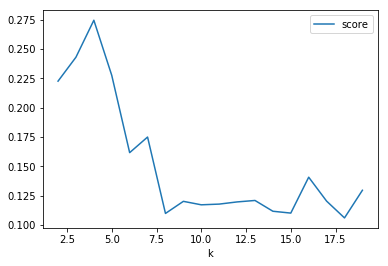

In [219]:
%pylab inline
sil_df.plot(kind = 'line', x = 'k', y= 'score')

## 新聞分群(二)

In [220]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [222]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])

In [223]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [224]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [225]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
k_data = kmeans.fit_predict(cs)

In [226]:
titles_ary = np.array(titles)

In [230]:
for rec in titles_ary[k_data == 3]:
    print(rec)

小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
醉女盧小小　女警帥爆！突然霸氣送她側摔　
明明是好康分享文　網友卻瘋喊噁心慎入
「想抱孫要看天！」　他批小嫻婆婆殘忍強逼
砲轟小嫻被酸民攻陷　「何三姑」粉絲頁關了
【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
十二月十四日各報頭條搶先報
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
【毒菇護弟】何守正姊姊不是華岡七仙女　美法連線批小嫻
小嫻離婚導火線　拉何守正信妙禪
【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了
小嫻中分手魔咒！ 同公司4女星全都婚變
他因為小嫻婚變被分手　網友跪求：拜託別放生
潔哥目睹「正嫻之變」　驚呼：靠北系列竟是真的
何守正姐姐神護航！遭網友酸：全台最討人厭大姑
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
【小嫻婚變】他說很奇怪　「一定是男生劈腿？」
教友小嫻婚姻觸礁　曾之喬談情避不開Seafood
小嫻守正結婚在台沒登記　想離婚只有兩條路
胡瓜2個月前耳聞小嫻婚變　震驚之餘好心疼
昔日搭檔談小嫻婚變　曾國城這樣說
何守正兩個姊姊護航扯婆媳　「他」戳破媽寶特色
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
【K律師論點】離婚＝失敗？　K律師這麼說
真尷尬！他只是聊個天　正妹就退出對話了
女網紅因為這理由挺余祥銓！讓人不知該哭還是笑
「小嫻不快樂！」　許聖梅：何守正虧欠她
一下車有人墜樓掉在車頂　網友：車牌有密碼
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
【話當年】被拍和她上賓館　何守正掰了阿妹
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄


In [233]:
sil_ary = []
for k in range(2,30):
    kmeans = cluster.KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    k_data = kmeans.fit_predict(cs)
    sil    = silhouette_score(cs, labels=k_data)
    sil_ary.append({'k':k, 'score':sil})

In [239]:
sil_df = pandas.DataFrame(sil_ary)
sil_df.sort_values('score', ascending=False)

,k,score
0,2,0.667866
1,3,0.271442
2,4,0.141728
25,27,0.107911
4,6,0.104680
12,14,0.104661
23,25,0.102888
15,17,0.102328
13,15,0.102218
27,29,0.102131


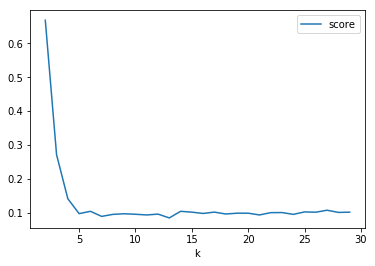

In [235]:
sil_df.plot(kind = 'line', x = 'k', y= 'score')

In [243]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
k_data = kmeans.fit_predict(cs)

In [246]:
for rec in titles_ary[k_data == 2]:
    print(rec)

小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
醉女盧小小　女警帥爆！突然霸氣送她側摔　
明明是好康分享文　網友卻瘋喊噁心慎入
「想抱孫要看天！」　他批小嫻婆婆殘忍強逼
砲轟小嫻被酸民攻陷　「何三姑」粉絲頁關了
【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
十二月十四日各報頭條搶先報
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
【毒菇護弟】何守正姊姊不是華岡七仙女　美法連線批小嫻
小嫻離婚導火線　拉何守正信妙禪
【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了
小嫻中分手魔咒！ 同公司4女星全都婚變
他因為小嫻婚變被分手　網友跪求：拜託別放生
潔哥目睹「正嫻之變」　驚呼：靠北系列竟是真的
何守正姐姐神護航！遭網友酸：全台最討人厭大姑
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
【小嫻婚變】他說很奇怪　「一定是男生劈腿？」
教友小嫻婚姻觸礁　曾之喬談情避不開Seafood
小嫻守正結婚在台沒登記　想離婚只有兩條路
胡瓜2個月前耳聞小嫻婚變　震驚之餘好心疼
昔日搭檔談小嫻婚變　曾國城這樣說
何守正兩個姊姊護航扯婆媳　「他」戳破媽寶特色
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
【K律師論點】離婚＝失敗？　K律師這麼說
真尷尬！他只是聊個天　正妹就退出對話了
女網紅因為這理由挺余祥銓！讓人不知該哭還是笑
「小嫻不快樂！」　許聖梅：何守正虧欠她
一下車有人墜樓掉在車頂　網友：車牌有密碼
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
【話當年】被拍和她上賓館　何守正掰了阿妹
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄


## 社群偵測法

In [247]:
import networkx as nx
m = np.array([[1,0,1],\
              [0,1,1],\
              [1,1,1]])

In [248]:
G = nx.from_numpy_matrix(m)

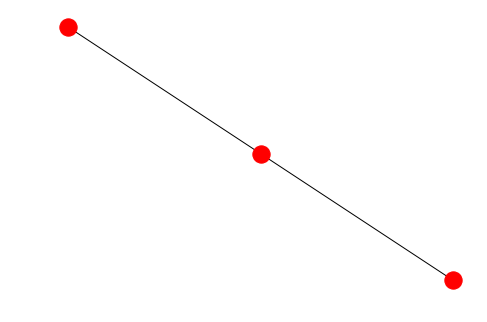

In [249]:
nx.draw(G)

In [253]:
 m = (cs < 0.7).astype(int)

In [254]:
G = nx.from_numpy_matrix(m)

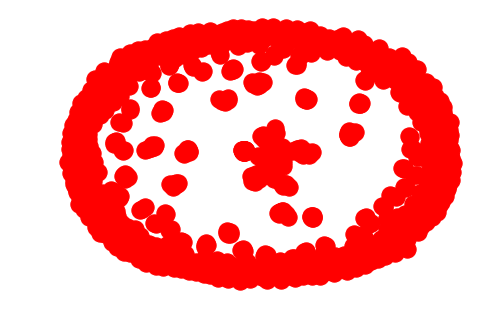

In [256]:
nx.draw(G)

In [258]:
nx.write_graphml(G,'article.graphml')

## 安裝Python-louvain
! pip install python-louvain

In [259]:
! pip install python-louvain

  Running setup.py bdist_wheel for python-louvain: started
  Running setup.py bdist_wheel for python-louvain: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\c3\b0\db\198c7453d5169907dbdbb090eebc0c6839f75e36b09c6dc7aa
Successfully built python-louvain


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [260]:
from community import best_partition
comm = best_partition(G)

In [264]:
from collections import Counter
c = Counter(comm.values())
c.most_common(10)

[(15, 38),
 (3, 30),
 (12, 25),
 (19, 23),
 (55, 13),
 (159, 10),
 (5, 9),
 (8, 8),
 (11, 8),
 (91, 8)]

In [275]:
len(c)

570

In [276]:
groups = np.array(list(comm.values())) 
for rec in titles_ary[groups == 55]:
    print(rec)

被爆賤賣中視讓利4.8億　馬英九回應了
徐永明：看來蔡正元不願再掩護馬英九
 回應北檢聲明　徐巧芯 ：不要事情鬧大了才推給媒體
「狗急跳牆亂咬人」溫紳說馬英九該告媒體
遭馬英九告洩密　北檢：嚴守偵查不公開
「忍無可忍」　馬英九怒告檢察長洩三中案不實秘密
李惠仁怒嗆：馬英九，你有什麼資格按鈴？！
馬英九反擊！不滿遭影射三中案有罪　馬親自到地檢署告北檢洩密
三中案馬英九圖利中時老闆？　北檢：不評論
藍營人士：北檢一再人格謀殺馬英九　「營造有罪氛圍」
三中案交易傳有馬英九讓利關鍵錄音　馬辦諷：宛如小說
三中案祕錄光碟！恐扳倒馬英九　當年他錄的
三中案500萬禮盒照　馬英九一句話成關鍵


In [284]:
feature_names = np.array(vectorizer.get_feature_names())

In [286]:
mat = np.sum(X[groups == 15], axis = 0)
a = np.squeeze(np.asarray(mat))
feature_names[a.argsort()[::-1][0:10]]

array(['小嫻', '何守', '離婚', '自己', '報導', '婚變', '時間', '婚姻', '美國', '表示'],
      dtype='<U18')

## 新聞分類

In [287]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [289]:
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [292]:
news['category'].value_counts()

生活      160
社會      146
國際      127
財經地產    110
娛樂      101
政治       84
體育       62
論壇       38
副刊       25
3C       22
動物       19
壹週刊       5
Name: category, dtype: int64

In [359]:
corpus = []
titles = []
tags   = []
#for rec in news[news['category'].isin(['社會', '娛樂','財經地產'])].iterrows():
for rec in news[news['category'].isin(['社會', '娛樂'])].iterrows():
    corpus.append(' '.join([w for w in jieba.cut(rec[1]['content']) if re.search('[\u4e00-\u9fa5]', w)]))
    titles.append(rec[1]['title'])
    tags.append(rec[1]['category'])
    

In [360]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [361]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)

In [362]:
#vectorizer.get_feature_names()
import re
re.search('[\u4e00-\u9fa5]', '柯P')

<_sre.SRE_Match object; span=(0, 1), match='柯'>

In [363]:
X

<247x12329 sparse matrix of type '<class 'numpy.int64'>'
	with 29839 stored elements in Compressed Sparse Row format>

In [364]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_tag, test_tag, train_title, test_title  = train_test_split(X, tags, titles, test_size =0.33, random_state = 42)

In [365]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.01)
clf.fit(train_data,train_tag)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [366]:
predicted = clf.predict(test_data)

In [367]:
from sklearn.metrics import accuracy_score
accuracy_score(test_tag, predicted)

0.9878048780487805

In [368]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_tag, predicted)

['娛樂' '社會']


array([[35,  0],
       [ 1, 46]], dtype=int64)

In [369]:
from sklearn.metrics import classification_report
print(classification_report(test_tag, predicted))

             precision    recall  f1-score   support

         娛樂       0.97      1.00      0.99        35
         社會       1.00      0.98      0.99        47

avg / total       0.99      0.99      0.99        82



In [370]:
test_title_ary = np.array(test_title)
test_title_ary[predicted != test_tag]

array(['【K律師論點】離婚＝失敗？\u3000K律師這麼說'], dtype='<U36')

In [375]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(\
                    zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], \
                        clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)

(63.0, '男子', 0.0, 63.0)
(46.666666666666664, '警方', 2.0, 140.0)
(38.0, '突發', 0.0, 38.0)
(37.0, '女子', 0.0, 37.0)
(35.0, '警員', 0.0, 35.0)
(30.0, '少年', 0.0, 30.0)
(30.0, '機車', 0.0, 30.0)
(30.0, '法官', 0.0, 30.0)
(30.0, '派出所', 0.0, 30.0)
(28.0, '詐騙', 0.0, 28.0)
(27.0, '進行', 0.0, 27.0)
(26.0, '張男', 0.0, 26.0)
(26.0, '新北', 0.0, 26.0)
(26.0, '時許', 0.0, 26.0)
(25.0, '女友', 0.0, 25.0)
(25.0, '林男', 0.0, 25.0)
(24.0, '分局', 0.0, 24.0)
(23.0, '消防局', 0.0, 23.0)
(23.0, '警察', 0.0, 23.0)
(22.0, '審團', 0.0, 22.0)


## 抓取電影評論

In [377]:
import requests
res = requests.get('https://movies.yahoo.com.tw/movieinfo_review.html/id=7803?sort=update_ts&order=desc&page=2')
#res.text

In [390]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
comment_ary = []
for rec in soup.select('#form_good1'):
    comment = rec.select('span')[2].text
    stars = rec.select_one('input[name=score]').get('value')
    comment_ary.append({'comment':comment, 'stars':stars})

In [392]:
import pandas
df = pandas.DataFrame(comment_ary)
df.head()

,comment,stars
0,今年看過最爛的電影，就猛毒，彩蛋連看都不想看，直接離場,2
1,超-好-看 參雜很多美式幽默 笑果十足 絕無冷場!! 大推,5
2,"超好看的!! 湯姆哈迪演技厲害 好笑,跟猛毒的對角戲也有趣相互對應\r\n\r\n雖然跟美曼...",5
3,我不是漫威迷 當下去看只是星期五沒課 因為才中午 有些店家都還沒開 就跟女友去看猛毒殺時間 ...,4
4,值得去看喔，挺有趣的👍👍👍👍,5


In [394]:
movies = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/yahoo_movie.xlsx')
movies.tail()

,content,stars,title,status
447,參加首映看3D版，覺得效果很好，故事連結也很有意思，期待第6集，不知又是怎樣的故事連結..,5,最終騎士,good
448,第五集打算看二輪看就好...第四集騙錢,2,最終騎士,bad
449,今天等等要去看早場的囉！\r\n超期待的！看到一個相當不錯的介紹，\r\n將歷年來變形金剛的...,5,最終騎士,good
450,樓下都還沒上映就看過也是屌,5,最終騎士,good
451,"像看動畫一樣,還機器恐龍哩,了無新意,還不如看騎士隊被勇士打爆!",1,最終騎士,bad


In [395]:
movies = movies[movies['status'].isin(['good', 'bad'])]

In [424]:
stopwords = ['但是', '當然', '明明']

In [425]:
corpus = []
tags   = []
for rec in movies.iterrows():
    corpus.append(' '.join([w for w in jieba.cut(rec[1]['content']) if re.search('[\u4e00-\u9fa5]' , w)]))
    tags.append(rec[1]['status'])

In [426]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(corpus)

In [427]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_tag, test_tag = train_test_split(X, tags,test_size = 0.33, random_state = 42 )

In [428]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_data, train_tag)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [429]:
predicted = clf.predict(test_data)

In [430]:
from sklearn.metrics import accuracy_score
accuracy_score(test_tag,predicted)

0.7561728395061729

In [431]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_tag,predicted)

['bad' 'good']


array([[ 86,  42],
       [ 37, 159]], dtype=int64)

In [433]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(\
                    zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], \
                        clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)

(5.971087100761717, '浪費', 5.971087100761717, 0.0)
(4.29646936168443, '爛片', 7.070201993658692, 0.6455841758608096)
(4.22887086437503, '看到', 13.765678753958733, 2.255166496079117)
(3.2385529568138596, '失望', 6.931916272194958, 1.14043628887103)
(3.149720440621485, '睡覺', 3.7968255373079396, 0.20544842276820344)
(3.108971526295652, '演什麼', 3.108971526295652, 0.0)
(2.8655387651608417, '第一次', 3.218298215434165, 0.12310405797407635)
(2.822140381376824, '只有', 4.68561321849735, 0.6603047989453319)
(2.2590217356092395, '空洞', 3.1316649602075595, 0.38629253133900265)
(1.9997351156262497, '爛透', 1.9997351156262497, 0.0)
(1.966475587026853, '七八', 2.494337397289918, 0.2684303907688719)
(1.9124227025361829, '第五集', 2.082928725325015, 0.08915707942742648)
(1.8560986438891276, '金剛', 4.238372117879498, 1.28348430285943)
(1.8429668409228688, '嫌太', 1.8429668409228688, 0.0)
(1.6466371583310369, '爛爆', 1.6466371583310369, 0.0)
(1.58771271333764, '完全', 4.968845239188478, 2.1295619147264535)
(1.5732811476922162, '除

In [435]:
from sklearn.externals import joblib
joblib.dump(clf, 'movie.pkl') 

['movie.pkl']

In [436]:
clf2 = joblib.load('movie.pkl')

In [447]:
newcomment = '漫威....很讓人失望！拍攝手法跟據情真的很膩！租片就好，不值得進電影院看...除非你很閒！'

In [448]:
c1 = ' '.join(jieba.cut(newcomment))

In [449]:
X2 = vectorizer.transform([c1])

In [465]:
#vectorizer

In [450]:
clf.predict(X2)

array(['bad'], dtype='<U4')